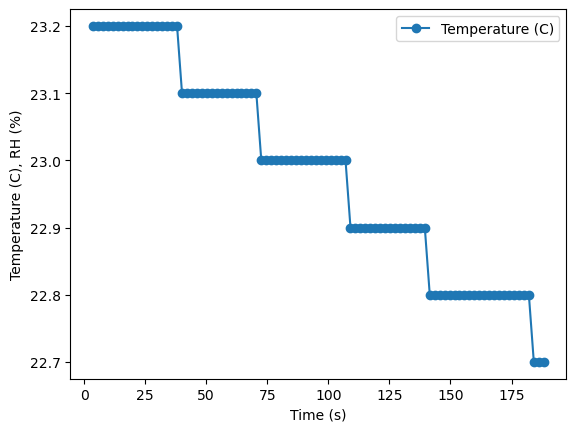

In [4]:
import serial
import time
import csv
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

####################################################
PORT_NAME = '/dev/cu.usbmodem21301' # CHANGE THIS for your system
####################################################

timestr = time.strftime("%Y%m%d-%H%M%S")
FILE_NAME = 'DHT11data'+timestr+'.csv'

t = []
T = []
RH = []

f = open(FILE_NAME,'a',newline='')          # open a file for 'a'ppending
writer = csv.writer(f,delimiter=',')        # prepare for writing to file

# Write data-field titles to file
writer.writerow(['Time (s)', 'Temperature (C)','Relative Humidity (%)'])

n = 0             # to count how many data-points we have collected
startTime = time.time() # capture current time as datum

try:
    arduino = serial.Serial(PORT_NAME, 9600) #open the port
    while True:
        arduino_data = arduino.readline() # reads the data from arduino
        decoded_values = arduino_data.decode("utf-8").split('x') # deals with the odd way the data are presented to the serial port

        tn=time.time()-startTime
        Tn = float(decoded_values[0])
        RHn = float(decoded_values[1])
        #print(n,tn,Tn,RHn)
        writer.writerow([tn, Tn, RHn]) #write data to csv file
    
        t.append(tn)     # store the current time
        T.append(Tn)     # store the current temperature
        RH.append(RHn)     # store the current RH
           
        n = n + 1

        plt.figure()
        plt.plot(t, T, 'o-', label="Temperature (C)")
        # plt.plot(t, RH, 'o-', label="Relative Humidity (%)")
        plt.xlabel("Time (s)")
        plt.ylabel("Temperature (C), RH (%)")            
        plt.legend()

        # Animation commands
        display.clear_output(wait=True) #necessary to not create a new figure at every iteration
        display.display(plt.gcf()) #necessary to keep the figure displayed in the notebook after every iteration
        plt.close()
    
except KeyboardInterrupt:

    arduino.close()   # close board connection
    f.close()       # close file gracefully when program is terminated